In [12]:
#Link : https://indianaiproduction.com/directing-customers-to-subscription-through-financial-app-behavior-analysis-ml-project/

# Goal : 
if person is actively looking for enrolled , then he will not get discount

if person is not interested for enrolled , then he will get discount

# Analysis:

a) Which day and which time , people's are using APP Behaviuor is more

b) Which day and which time , people's are using APP Behaviuor is less

Note :
    
1)Why people are using less App Behaviour and reason?

2) Why people are not interested to use App Behaviour?

3)How can improve user and App behaviour enrolled?


In [2]:
!pip install XGBoost_Classifier

ERROR: Could not find a version that satisfies the requirement XGBoost_Classifier (from versions: none)
ERROR: No matching distribution found for XGBoost_Classifier


In [3]:
import numpy as  np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sb

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV,cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# import XGBoost_Classifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification,classification_report,roc_auc_score,roc_curve,f1_score

from dateutil import parser # convert time in date time data type


from collections import Counter

from pickle import dump, load
from joblib import dump, load

/home/rakesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
fineTech_appData = pd.read_csv("FineTech_appData.csv")

print("Shape : ",fineTech_appData.shape) # get shape of dataset
print("columns : ",fineTech_appData.columns)

FileNotFoundError: [Errno 2] File FineTech_appData.csv does not exist: 'FineTech_appData.csv'

In [6]:
fineTech_appData.head(4)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0


In [7]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [8]:
fineTech_appData.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [10]:
fineTech_appData.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
for i in [1,2,3,4,5]:
    print(fineTech_appData.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



# 1. user: Unique ID for each user.

2. first_open: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.

3. dayofweek: On which day user logon.

0: Sunday

1: Monday

2: Tuesday

3: Wednesday

4: Thursday

5: Friday

6: Saturday

4. Hour: Time of a day in 24-hour format customer logon. It is correlated with dayofweek column.

5. age: The age of the registered user.

6. screen_list: The name of multiple screens seen by customers, which are separated by a comma.

7. numscreens: The total number of screens seen by customers.

8. minigame: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.

9. used_premium_feature: If the customer used the premium feature of the app then 1 otherwise 0.

10. enrolled: If the user bought a premium feature app then 1 otherwise 0.

11. enrolled_date: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.

12. liked: The each screen of the app has a like button if the customer likes it then 1 otherwise 0.

Find the null value in DataFrame using DataFrame.isnull() method and take summation by sum() method.

In [13]:
# Get the unique value of each columns and it's length
features = fineTech_appData.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, fineTech_appData[i].unique(), len(fineTech_appData[i].unique())))


Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
........................

          
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
........................

          
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
........................

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52 

In [14]:
#  hour data convert string to int
fineTech_appData['hour'] = fineTech_appData.hour.str.slice(1,3).astype(int) 
 
# get data type of each columns
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [18]:
print("dataframe   : ",type(fineTech_appData))
print("hour        : ", type(fineTech_appData.hour))


print("Screen List : ",type(fineTech_appData.screen_list))

dataframe   :  <class 'pandas.core.frame.DataFrame'>
hour        :  <class 'pandas.core.series.Series'>
Screen List :  <class 'pandas.core.series.Series'>


In [21]:
print("hour      dtype   : ", fineTech_appData.hour.dtypes)


print("Screen List dtype : ",fineTech_appData.screen_list.dtypes)

hour      dtype   :  int32
Screen List dtype :  object


# Data visualization
Heatmap using the correlation matrix
Heatmap uses to find the correlation between each and every features using the correlation matrix.

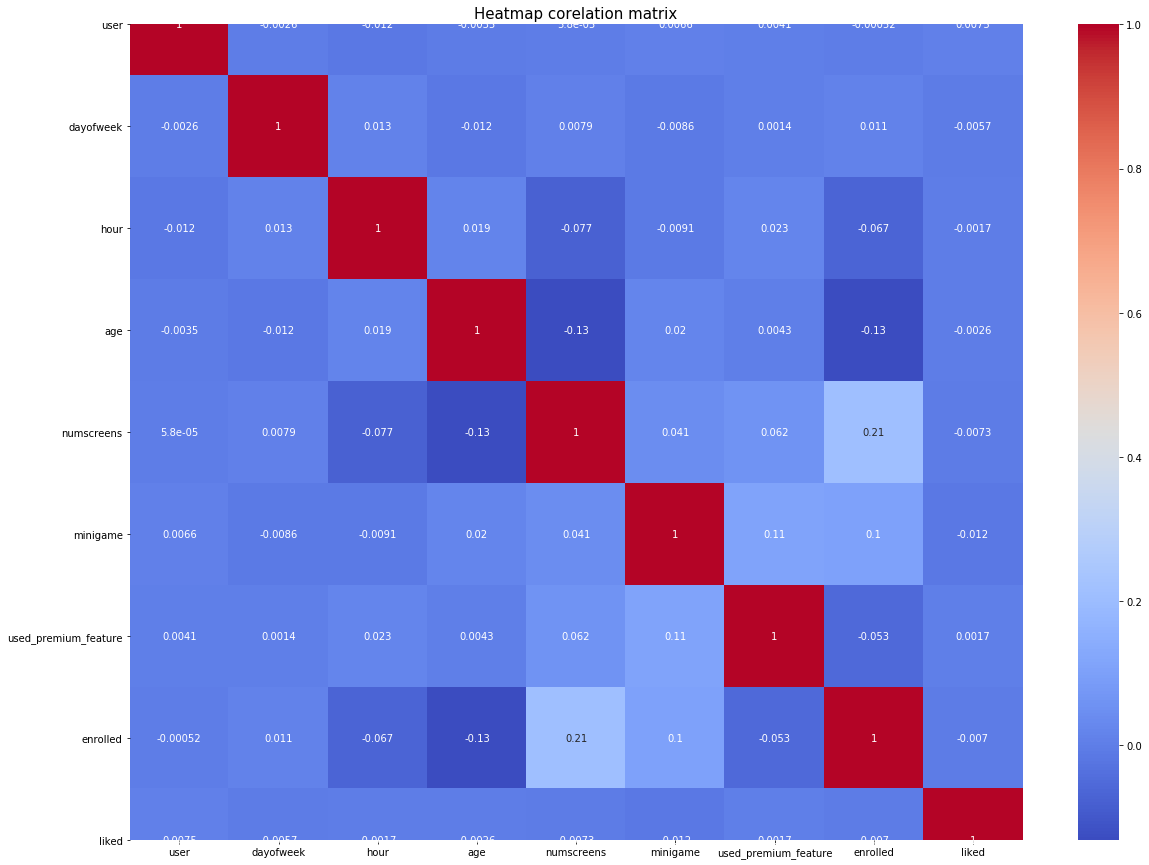

In [25]:
plt.figure(figsize=(20,15))
sb.heatmap(fineTech_appData.corr() , annot=True, cmap="coolwarm")
plt.title("Heatmap corelation matrix", fontsize = 15)
plt.show()

In the fineTech_appData2 dataset, there is no strong correlation between any features. There is little correlation between ‘numscreens’ and ‘enrolled’. It means that those customers saw more screen they are taking premium app. There is a slight correlation between ‘minigame’ with ‘anrolled’ and ‘used_premium_feature’. The slightly negative correlation between ‘age’ with ‘enrolled’ and ‘numscreens’. It means that older customers do not use the premium app and they don’t see multiple screens.

# Pair plot of fineTech_appData2

The pair plot helps to visualize the distribution of data and scatter plot.



In [26]:
# Pailplot of fineTech_appData2 Dataset
 
#%matplotlib qt5 # for show graph in seperate window


plt.figure(figsize=(20,15))
sb.pairplot(fineTech_appData , hue = "enrolled")
plt.show()

C:\Users\Rakesh Kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rakesh Kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: 

# In pair plot we can see, the maximum features have two values like 0 and 1 and orange dots show the enrolled customer’s features. So we visualize the counterplot of enrolled data.

# Countplot of enrolled

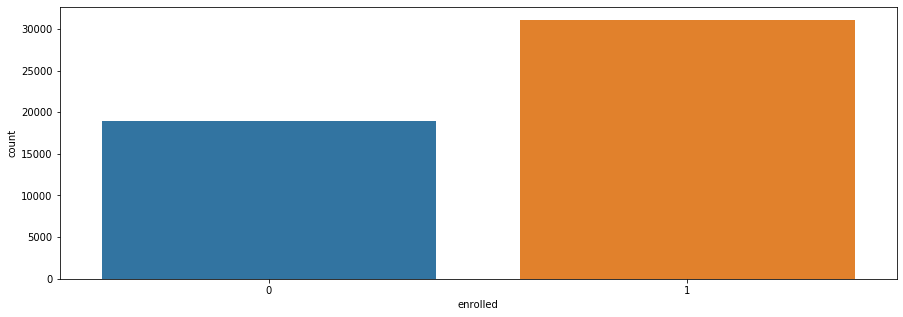

In [31]:
plt.figure(figsize=(15,5))

sb.countplot(fineTech_appData.enrolled)
plt.show()

# Here you can see the exact value of enrolled & not enrolled customers.



In [52]:
# value enrolled and not enrolled customers
print("Not enrolled user = ", (fineTech_appData.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(fineTech_appData.enrolled < 1).sum(),  "out of 50000")

#OR
print("enrolled : ", Counter(fineTech_appData.enrolled))

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000
enrolled :  Counter({1: 31074, 0: 18926})


In [51]:
print("enrolled : ", Counter(fineTech_appData.enrolled))

print("\n")

print("dayofweek : ", Counter(fineTech_appData.dayofweek))

print("\n")

print("hour : ", Counter(fineTech_appData.hour))

print("\n")

print("minigame : ", Counter(fineTech_appData.minigame))

print("\n")

print("used_premium_feature : ", Counter(fineTech_appData.used_premium_feature))

print("\n")

print("liked : ", Counter(fineTech_appData.liked))

enrolled :  Counter({1: 31074, 0: 18926})


dayofweek :  Counter({4: 7531, 0: 7515, 5: 7423, 6: 7418, 1: 7139, 3: 6659, 2: 6315})


hour :  Counter({15: 2989, 20: 2818, 17: 2811, 16: 2790, 21: 2764, 18: 2729, 19: 2708, 22: 2704, 0: 2666, 23: 2635, 2: 2503, 1: 2438, 14: 2309, 3: 2158, 13: 1946, 4: 1933, 5: 1570, 12: 1511, 6: 1283, 11: 1111, 7: 1107, 8: 898, 10: 849, 9: 770})


minigame :  Counter({0: 44609, 1: 5391})


used_premium_feature :  Counter({0: 41399, 1: 8601})


liked :  Counter({0: 41750, 1: 8250})


# Histogram of each feature of fineTech_appData2
In pair plot, we saw the distribution of each feature but here we visualize in the histogram to understand easily.

In [57]:

# drop object dtype columns : bcoz , it is less used
fineTech_appData2 = fineTech_appData.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)


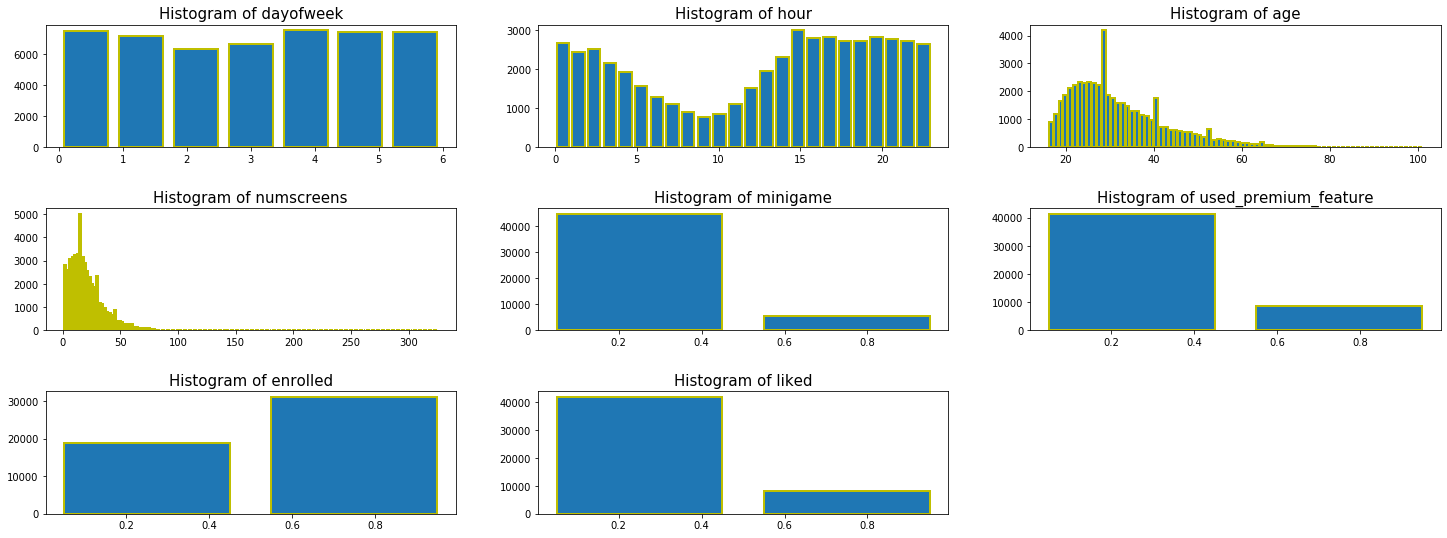

In [58]:
# plot histogram 
 
plt.figure(figsize = (25,9)) # figure size in ratio 16:9
features = fineTech_appData2.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
     
    bins = len(fineTech_appData2[j].unique()) # bins for histogram
    plt.hist(fineTech_appData2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
     
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots)